In [19]:
import pandas as pd
import numpy as np
import flow
import pool
import os
import matplotlib.pyplot as plt

In [10]:
def singleday(DaySorter, trace_type='dff'):
    """Build df for a single day loading/indexing efficiently.

    Parameters
    ----------
    mouse : str, mouse
    date : str, date
    trace_type : str, {'dff', 'zscore', 'deconvolved'}

    Returns
    -------
    pandas df
        df of all traces over all days for a cell
    """

    # assign folder structure for loading and load
    save_dir = os.path.join(flow.paths.outd, str(DaySorter.mouse),
                            'dfs ' + str(trace_type))
    path = os.path.join(save_dir, str(DaySorter.mouse) + '_'
                        + str(DaySorter.date) + '_df_' + trace_type
                        + '.pkl')
    dft = pd.read_pickle(path)

    # slice out your day of interest
    day_indexer = dft.index.get_level_values('date') == DaySorter.date
    dft = dft.loc[day_indexer, :]

    return dft

/Users/kelly_mcguire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/Users/kelly_mcguire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less
/Users/kelly_mcguire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice
/Users/kelly_mcguire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater
/Users/kelly_mcguire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice
/Users/kelly_mcguire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less
/Users/kelly_mcguire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice
/Users/kelly_mcguire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid

ValueError: x and y must have same first dimension, but have shapes (1,) and (2,)

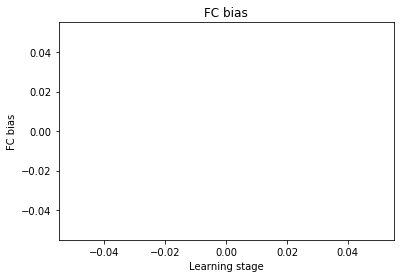

In [135]:
mice = ['OA27', 'OA26', 'VF226', 'OA67', 'CC175']
naive = []
early = []
late = []
during = []
post = []
during2 = []
post2 = []
for mouse in range(5):
    dprime = xmouse_dprime[mouse]
    lstate = xmouse_lstate[mouse]
    bias = xmouse_bias[mouse]
    xdp = []
    xls = []
    xbias =[]
    c = 0
    for dp, ls in zip(dprime, lstate):
        xbias.append(np.nanmean(bias[c]))
        xdp.append(dp)
        xls.append(ls)
        c = c + 1
    xbias = np.array(xbias)
    xdp = np.array(xdp)
#     xbias = np.array(xbias)
    naive.append(np.nanmean(xbias[xls == 'naive']))
    early.append(np.nanmean(xbias[((xls == 'learning') | (xls == 'learning_start')) & (xdp < 2)]))
    late.append(np.nanmean(xbias[(xls == 'learning') & (xdp > 2)]))
    during.append(np.nanmean(xbias[((xls == 'reversal1_start') | (xls == 'revesal1')) & (xdp < 2)]))
    post.append(np.nanmean(xbias[(xls == 'reversal1') & (xdp > 2)]))
    during2.append(np.nanmean(xbias[((xls == 'reversal2_start') | (xls == 'revesal2')) & (xdp < 2)]))
    post2.append(np.nanmean(xbias[(xls == 'reversal2') & (xdp > 2)]))

plt.figure()
c = 0
for mouse in zip(naive, early, late, during, post, during2, post2):
    plt.plot(mouse, label=mice[c])
    plt.title('FC bias')
    plt.ylabel('FC bias')
    plt.xlabel('Learning stage')
#     plt.xticklabel(['naive', 'early', 'late', 'during', 'post', 'during2', 'post2'])
    x = plt.xlim
    plt.plot(x, [0.33, 0.33], '--')
    c = c + 1

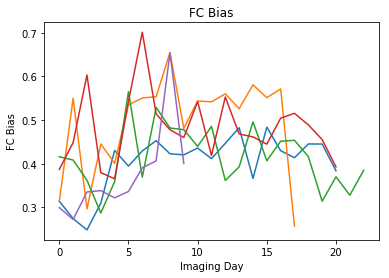

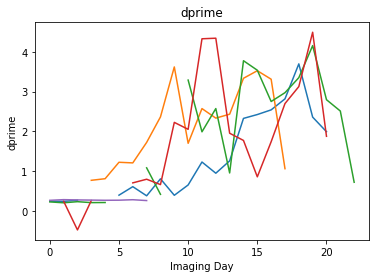

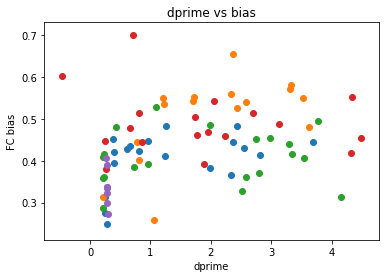

In [130]:
# bias over days
plt.figure()
for m in xmouse_bias:
    xdb = []
    for d in m:
        xdb.append(np.nanmean(d))
    plt.plot(xdb)
    plt.title('FC Bias')
    plt.ylabel('FC Bias')
    plt.xlabel('Imaging Day')
    
# dprime over days
plt.figure()
for m in xmouse_dprime:
    xdb = []
    for d in m:
        xdb.append(d)
    plt.plot(xdb)
    plt.title('dprime')
    plt.ylabel('dprime')
    plt.xlabel('Imaging Day')
    
# dprime over days
plt.figure()
for c, d in enumerate(xmouse_dprime):
    b = xmouse_bias[c]
    x = []
    y = []
    for dp in d:
        x.append(dp)
    for bp in b:
        y.append(np.nanmean(bp))
        
    plt.scatter(x, y)
    plt.title('dprime vs bias')
    plt.ylabel('FC bias')
    plt.xlabel('dprime')

In [120]:
dfm.head()

orientation condition  trialerror  hunger  \
mouse date   run trial_idx                                              
CC175 180606 1   0                    0      plus           1  hungry   
                 1                  270     minus           4  hungry   
                 2                  135   neutral           2  hungry   
                 3                  270     minus           4  hungry   
                 4                  135   neutral           2  hungry   

                           learning_state       tag  firstlick  ensure  \
mouse date   run trial_idx                                               
CC175 180606 1   0                  naive  standard        NaN     NaN   
                 1                  naive  standard        NaN     NaN   
                 2                  naive  standard        NaN     NaN   
                 3                  naive  standard        NaN     NaN   
                 4                  naive  standard        NaN     NaN   

                            quinine      speed  
mouse date   run trial_idx                      
CC175 180606 1   0              NaN   5.395385  
                 1              NaN  11.808673  
                 2              NaN  16.477462  
                 3              NaN  15.404902  
                 4              NaN  15.526276

In [129]:
xmouse_bias = []
xmouse_norm_response = []
xmouse_dprime = []
xmouse_lstate = []
for mouse in ['OA27', 'OA26', 'VF226', 'OA67', 'CC175']:
# mouse='OA27'
    trace_type='dff'
    driven=True
    drive_css=['plus', 'minus', 'neutral']
    stim_offset=3
    smooth=True

    """
    Get mean repsonse per cell.
    """

    # get all days for a mouse
    learning_state = []
    xday_bias = []
    xday_norm_response = []
    xday_dprime = []
    days = flow.metadata.DateSorter.frommeta(mice=[mouse])
    for DaySorter in days:

        # get all cell ids
        d1_ids = flow.xday._read_crossday_ids(DaySorter.mouse, DaySorter.date)
        d1_ids = np.array([int(s) for s in d1_ids])

        # filter cells based on visual drive across all cs, prevent
        # breaking when only pavs are shown
        if driven:
            d1_drive = []
            for dcs in drive_css:
                try:
                    d1_drive.append(pool.calc.driven.visually(DaySorter, dcs))
                except KeyError:
                    print(str(DaySorter) + ' requested ' + dcs +
                          ': no match to what was shown (probably pav only).')
            d1_drive = np.max(d1_drive, axis=0) > 20
            cells = d1_ids[d1_drive]
        else:
            cells = d1_ids

        # get traces for the day
        dft = singleday(DaySorter, trace_type=trace_type)
        dft = dft.reset_index(level=['cell_idx', 'timestamp'])

        # filter out cells which are not driven 
        cell_indexer = dft['cell_idx'].isin(cells)
        dft = dft.loc[cell_indexer,:]

        # keep only times when stim is on the screen 
        time_indexer = dft['timestamp'].between(0, stim_offset, inclusive=False)
        dft = dft.loc[time_indexer,:]

        # get metadata for the day
        save_dir = os.path.join(flow.paths.outd, str(DaySorter.mouse))
        meta_path = os.path.join(save_dir, str(DaySorter.mouse) + '_df_trialmeta.pkl')
        dfm = pd.read_pickle(meta_path)

        # filter metadata trials before merging
        responses = []
        for dcs in drive_css:
            trial_indexer = (
                            ((dfm.orientation == 0) |
                             (dfm.orientation == 135) |
                             (dfm.orientation == 270))
                            &
                            ((dfm.learning_state == 'naive') |
                             (dfm.learning_state == 'learning_start') |
                             (dfm.learning_state == 'learning') |
                             (dfm.tag == 'reversal1') |
                             (dfm.tag == 'reversal1_start') |
                             (dfm.tag == 'reversal2') |
                             (dfm.tag == 'reversal2_start'))
                            &
                            ((dfm.condition == dcs))
                            &
                            ((dfm.tag == 'standard'))
                            &
                            (dfm.hunger == 'hungry'))
            dfcs = dfm.loc[trial_indexer, :]

            # merge on filtered trials
            dff = pd.merge(dft, dfcs, on=['mouse', 'date', 'run', 'trial_idx'], how='inner')

            # check that df is not empty, skip dfs that filtering empties
            if dff.empty:
                print('Day: ' + str(DaySorter.date) + ': skipped: empty dataframe after merge.')
                break

            # smooth signal with rolling 3 unit window
            if smooth:
                dff['trace'] = dff['trace'].rolling(3).mean()

            trial_mean = dff.pivot_table(index=['cell_idx', 'trial_idx'],
                                         columns='timestamp', 
                                         values='trace').mean(axis=1).to_frame()
            cell_mean = trial_mean.pivot_table(index=['cell_idx'],
                                          columns=['trial_idx']).mean(axis=1).tolist()
            responses.append(cell_mean)

        if len(responses) != 3:
            continue
        
        try: # CHECK ON THIS KEY ERROR! all days that make it here have the three stimuli!
            xday_dprime.append(pool.calc.behavior.dprime(DaySorter, hmm_engaged=False))
        except KeyError:
            xday_dprime.append(np.nan)
        max_response = np.array([np.nanmax(s) for s in zip(*responses)])
        max_bool = max_response > 0
        min_response = np.array([np.nanmin(s) for s in zip(*responses)])
        norm_response = [(np.array(s)-min_response)/max_response for s in responses]

        bias = np.array(norm_response[0])/np.array([np.nansum(cell) for cell in zip(*norm_response)])

        xday_bias.append(bias[max_bool])
        xday_norm_response.append([s[max_bool] for s in norm_response])
        learning_state.append(np.unique(dff['learning_state']))
    
    xmouse_lstate.append(learning_state)
    xmouse_bias.append(xday_bias)
    xmouse_norm_response.append(xday_norm_response)
    xmouse_dprime.append(xday_dprime)

Recalcing pool.calc.behavior.dprime
Recalcing pool.calc.behavior.incorrect_count
Day: 170127: skipped: empty dataframe after merge.
Day: 170128: skipped: empty dataframe after merge.
Day: 170129: skipped: empty dataframe after merge.
Day: 170131: skipped: empty dataframe after merge.
Day: 170201: skipped: empty dataframe after merge.
Day: 170202: skipped: empty dataframe after merge.
Recalcing pool.calc.behavior.dprime
Recalcing pool.calc.behavior.incorrect_count
Day: 170320: skipped: empty dataframe after merge.
Day: 170321: skipped: empty dataframe after merge.
Day: 170322: skipped: empty dataframe after merge.
Day: 170323: skipped: empty dataframe after merge.
Day: 170326: skipped: empty dataframe after merge.
Day: 170328: skipped: empty dataframe after merge.
Day: 170403: skipped: empty dataframe after merge.
Day: 170404: skipped: empty dataframe after merge.
Recalcing pool.calc.behavior.dprime
Recalcing pool.calc.behavior.correct_count
Recalcing pool.calc.behavior.trial_count
Reca

In [128]:
# bias over days
plt.figure()
for m in xmouse_bias:
    xdb = []
    for d in m:
        xdb.append(np.nanmean(d))
    plt.plot(xdb)
    plt.title('Plus Bias')

<Figure size 432x288 with 0 Axes>

In [ ]:
# save1 = [xmouse_bias, xmouse_dprime]
# save2 = [xmouse_bias, xmouse_dprime]
save3 = [xmouse_bias, xmouse_dprime]

In [111]:
pool.calc.behavior.dprime(DaySorter)

Recalcing pool.calc.behavior.dprime
Recalcing pool.calc.behavior.correct_count
Recalcing pool.calc.behavior.engaged
Recalcing pool.calc.behavior.trial_count
Recalcing pool.calc.behavior.incorrect_count
Recalcing pool.calc.behavior.trial_count
Recalcing pool.calc.behavior.incorrect_count
Recalcing pool.calc.behavior.trial_count
Recalcing pool.calc.behavior.correct_count
Recalcing pool.calc.behavior.engaged
Recalcing pool.calc.behavior.trial_count
Recalcing pool.calc.behavior.incorrect_count
Recalcing pool.calc.behavior.trial_count
Recalcing pool.calc.behavior.incorrect_count
Recalcing pool.calc.behavior.trial_count
Recalcing pool.calc.behavior.correct_count
Recalcing pool.calc.behavior.engaged
Recalcing pool.calc.behavior.trial_count
Recalcing pool.calc.behavior.incorrect_count
Recalcing pool.calc.behavior.trial_count
Recalcing pool.calc.behavior.incorrect_count
Recalcing pool.calc.behavior.trial_count


3.896224802666854